## Publishing

We're still in our working directory:

In [6]:
import os
top_dir = os.getcwd()
git_dir = os.path.join(top_dir, 'learning_git')
working_dir = os.path.join(git_dir, 'git_example')
os.chdir(working_dir)
working_dir

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-d813747acc4e>", line 2, in <module>
    top_dir = os.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/anaconda3/lib/python3.6/site-packages/IPy

FileNotFoundError: [Errno 2] No such file or directory

### Sharing your work

So far, all our work has been on our own computer. But a big part of the point of version control is keeping your work safe, on remote servers. Another part is making it easy to share your work with the world In this example, we'll be using the "GitHub" cloud repository to store and publish our work. 

If you have not done so already, you should create an account on GitHub: go to [https://github.com/](https://github.com/), fill in a username and password, and click on "sign up for free". 

### Creating a repository

Ok, let's create a repository to store our work. Hit "new repository" on the right of the github home screen, or click [here](https://github.com/new). 

Fill in a short name, and a description. Choose a "public" repository. Don't choose to add a Readme.

### Paying for GitHub

For this course, you should use public repositories in your personal account for your example work: it's good to share! GitHub is free for open source, but in general, charges a fee if you want to keep your work private. 

In the future, you might want to keep your work on GitHub private. 

Students can get free private repositories on GitHub, by going to [GitHub Education](https://github.com/edu) and filling in a form (look for the Student Developer Pack). 

### Adding a new remote to your repository

Instructions will appear, once you've created the repository, as to how to add this new "remote" server to your repository, in the lower box on the screen. Mine say:

In [5]:
%%bash
git remote add origin https://github.com/alan-turing-institute/github-example.git

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: Unable to read current working directory: No such file or directory


In [3]:
%%bash
git push -uf origin master # I have an extra `f` switch here.
      #You should copy the instructions from YOUR repository.

git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


### Remotes

The first command sets up the server as a new `remote`, called `origin`. 

Git, unlike some earlier version control systems is a "distributed" version control system, which means you can work with multiple remote servers. 

Usually, commands that work with remotes allow you to specify the remote to use, but assume the `origin` remote if you don't. 

Here, `git push` will push your whole history onto the server, and now you'll be able to see it on the internet! Refresh your web browser where the instructions were, and you'll see your repository!

Let's add these commands to our diagram:

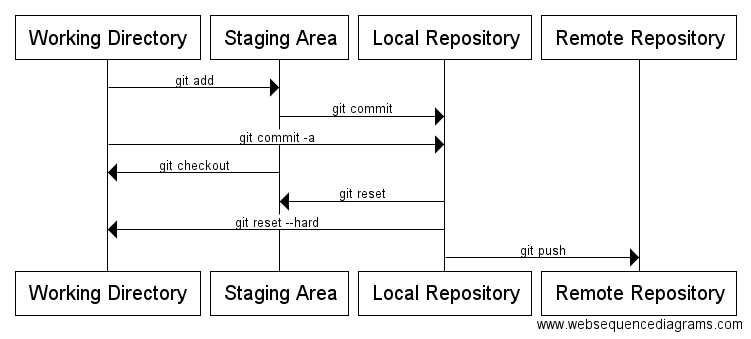

In [4]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Staging Area -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
"""
from wsd import wsd
%matplotlib inline
wsd(message)

### Playing with GitHub

Take a few moments to click around and work your way through the GitHub interface. Try clicking on 'index.md' to see the content of the file: notice how the markdown renders prettily.

Click on "commits" near the top of the screen, to see all the changes you've made. Click on the commit number next to the right of a change, to see what changes it includes: removals are shown in red, and additions in green.

## Working with multiple files

### Some new content

So far, we've only worked with one file. Let's add another:

``` bash
vim lakeland.md
```

In [5]:
%%writefile lakeland.md
Lakeland  
========   
  
Cumbria has some pretty hills, and lakes too.  

Writing lakeland.md


In [6]:
cat lakeland.md

Lakeland  
  
Cumbria has some pretty hills, and lakes too.  

### Git will not by default commit your new file

In [7]:
%%bash
git commit -am "Try to add Lakeland"

On branch master
Your branch is up-to-date with 'origin/master'.
Untracked files:
	lakeland.md
	wsd.py
	wsd.pyc

nothing added to commit but untracked files present


This didn't do anything, because we've not told git to track the new file yet.

### Tell git about the new file

In [8]:
%%bash
git add lakeland.md
git commit -am "Add lakeland"

[master 76322e5] Add lakeland
 1 file changed, 4 insertions(+)
 create mode 100644 lakeland.md


Ok, now we have added the change about Cumbria to the file. Let's publish it to the origin repository.

In [9]:
%%bash
git push

To git@github.com:UCL/github-example.git
   e533bb0..76322e5  master -> master


Visit GitHub, and notice this change is on your repository on the server. We could have said `git push origin` to specify the remote to use, but origin is the default.

## Changing two files at once

What if we change both files?

In [10]:
%%writefile lakeland.md
Lakeland  
========   
  
Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn

Overwriting lakeland.md


In [11]:
%%writefile index.md
Mountains and Lakes in the UK   
===================   
Engerland is not very mountainous.
But has some tall hills, and maybe a
mountain or two depending on your definition.

Overwriting index.md


In [12]:
%%bash
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
	modified:   index.md
	modified:   lakeland.md

Untracked files:
	wsd.py
	wsd.pyc

no changes added to commit


These changes should really be separate commits. We can do this with careful use of git add, to **stage** first one commit, then the other.

In [13]:
%%bash
git add index.md
git commit -m "Include lakes in the scope"

[master cdd35b8] Include lakes in the scope
 1 file changed, 2 insertions(+), 2 deletions(-)


Because we "staged" only index.md, the changes to lakeland.md were not included in that commit.

In [14]:
%%bash
git commit -am "Add Helvellyn"

[master 79b1285] Add Helvellyn
 1 file changed, 4 insertions(+), 1 deletion(-)


In [15]:
%%bash
git log --oneline

79b1285 Add Helvellyn
cdd35b8 Include lakes in the scope
76322e5 Add lakeland
e533bb0 Revert "Add a lie about a mountain"
972c8ed Change title
04ada3b Add a lie about a mountain
03915a3 First commit of discourse on UK topography


In [16]:
%%bash
git push

To git@github.com:UCL/github-example.git
   76322e5..79b1285  master -> master


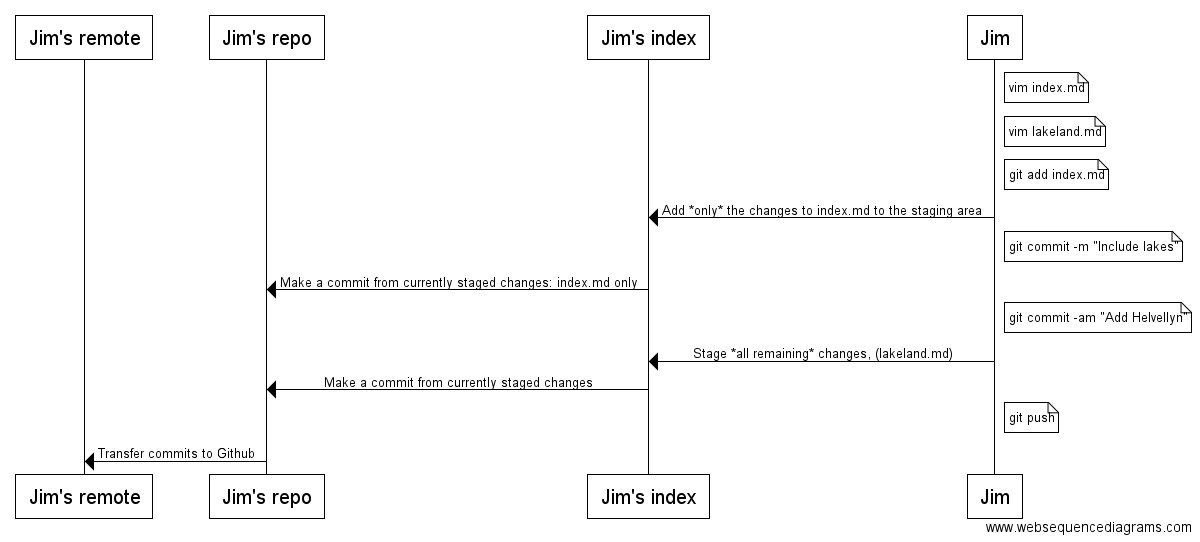

In [17]:
message="""
participant "Jim's remote" as M
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: vim index.md
note right of J: vim lakeland.md

note right of J: git add index.md
J->I: Add *only* the changes to index.md to the staging area

note right of J: git commit -m "Include lakes"
I->R: Make a commit from currently staged changes: index.md only

note right of J: git commit -am "Add Helvellyn"
J->I: Stage *all remaining* changes, (lakeland.md)
I->R: Make a commit from currently staged changes

note right of J: git push
R->M: Transfer commits to Github
"""
wsd(message)